# visualize Perceptual Memory based Choice model

number and EV perception

specifically for the case of Risky choices: two numerosity percepts in different ranges (2 priors)

enables plugging in estimated parameters and show perception curves

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_context('talk')
plt.rcParams['font.family'] = 'sans-serif' # Set font to helvetica

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_17424/2089008219.py:6: RuntimeWarning: divide by zero encountered in log
  axs[1].plot(x, np.exp(.5*np.log(x) + .5*np.log(5.)))


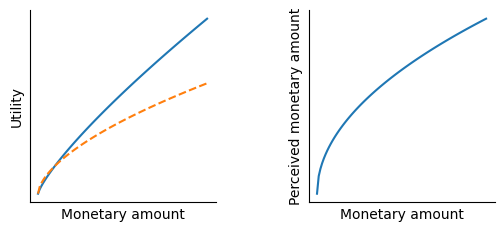

In [16]:

fig, axs = plt.subplots(1, 2, figsize=(6,2.5))
axs[0].plot(x, x**0.8)
axs[0].plot(x, x**0.6, '--')
axs[0].set(xlabel='Monetary amount', ylabel='Utility',xticks=[],yticks=[])

axs[1].plot(x, np.exp(.5*np.log(x) + .5*np.log(5.)))
axs[1].set(xlabel='Monetary amount', ylabel='Perceived monetary amount',xticks=[],yticks=[])

sns.despine()
plt.subplots_adjust(wspace=0.5)


If we approximate the `prior distribution` from which the true numerosity n is drawn (in a given experimental context) by a log-normal distribution, `log(n) ∼ N(μ,σ2)`, then the posterior distribution for n, conditional on an internal representation r drawn from 
will also be log-normal

n_hat = exp(r*beta) // log(n_hat) = r*beta

a log-normal distribution is a continuous probability distribution of a random variable whose logarithm is normally distributed. Thus, if the random variable X is log-normally distributed, then Y = ln(X) has a normal distribution

In [46]:
import pandas as pd

df = []
x = np.linspace(0, 10, 100)
stimulus_weights = np.array([0.25, 0.5, 0.75, 0.9]) # weights 
mu_prior = 2 # crossover point

for w_stimulus in stimulus_weights:
    w_prior = 1 - w_stimulus # weights (comprised of the widths of evidence and prior)
    # the new mean of combining two distributions is a by the SDs weigthed sum of the two means
    y = np.exp(w_stimulus * np.log(x)+ w_prior * np.log(mu_prior)) 
    df.append(pd.DataFrame({'x': x, 'y': y}))

df = pd.concat(df, keys=1-stimulus_weights, names=['Noise level']).reset_index()
df['Noise level'] = np.round(df['Noise level'], 2)
df.head()

/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_17424/749734097.py:10: RuntimeWarning: divide by zero encountered in log
  y = np.exp(w_stimulus * np.log(x)+ w_prior * np.log(mu_prior))


,Noise level,level_1,x,y
0,0.75,0,0.00000,0.000000
1,0.75,1,0.10101,0.948121
2,0.75,2,0.20202,1.127512
3,0.75,3,0.30303,1.247797
4,0.75,4,0.40404,1.340845


/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_17424/2165449409.py:1: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  ax = sns.relplot(data=df, x='x', y='y', hue='Noise level', kind='line', palette=sns.color_palette('inferno', 5),height=3, aspect=1)


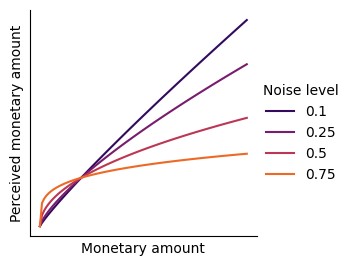

In [47]:
ax = sns.relplot(data=df, x='x', y='y', hue='Noise level', kind='line', palette=sns.color_palette('inferno', 5),height=3, aspect=1)
ax.set(xlabel='Monetary amount', ylabel='Perceived monetary amount',xticks=[],yticks=[])

In [49]:
from itertools import product

x = np.linspace(0, 10, 100)
sigma_prior = .5
sigma_noises = np.array([0.25, 0.5, 0.75])
mu_priors = np.log([2.5, 5., 7.5])

df = []
keys = [] 
for sigma_noise, mu_prior in product(sigma_noises, mu_priors):
    w_prior = sigma_noise**2 / (sigma_noise**2 + sigma_prior**2)
    w_stimulus = 1 - w_prior
    x_hat = np.exp(w_stimulus * np.log(x) + w_prior * mu_prior)
    keys.append((sigma_noise, mu_prior))
    df.append(pd.DataFrame({'x': x, 'x_hat':x_hat}))

df = pd.concat(df, keys=keys, names=['noise', 'prior mean']).reset_index()
df['noise'] = np.round(df['noise'], 2)
df['prior_mean_natural'] = np.round(np.exp(df['prior mean']), 1)
df.head()


/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_17424/205567337.py:13: RuntimeWarning: divide by zero encountered in log
  x_hat = np.exp(w_stimulus * np.log(x) + w_prior * mu_prior)


,noise,prior mean,level_2,x,x_hat,prior_mean_natural
0,0.25,0.916291,0,0.00000,0.000000,2.5
1,0.25,0.916291,1,0.10101,0.191902,2.5
2,0.25,0.916291,2,0.20202,0.334121,2.5
3,0.25,0.916291,3,0.30303,0.462144,2.5
4,0.25,0.916291,4,0.40404,0.581739,2.5


/var/folders/3k/8g0xv78x051fznwyh_m5xcn8f91w3q/T/ipykernel_17424/167609302.py:2: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  g = sns.relplot(data=df, x='x', y='x_hat', hue='prior_mean_natural', col='noise', kind='line', palette=sns.color_palette('inferno', 5))


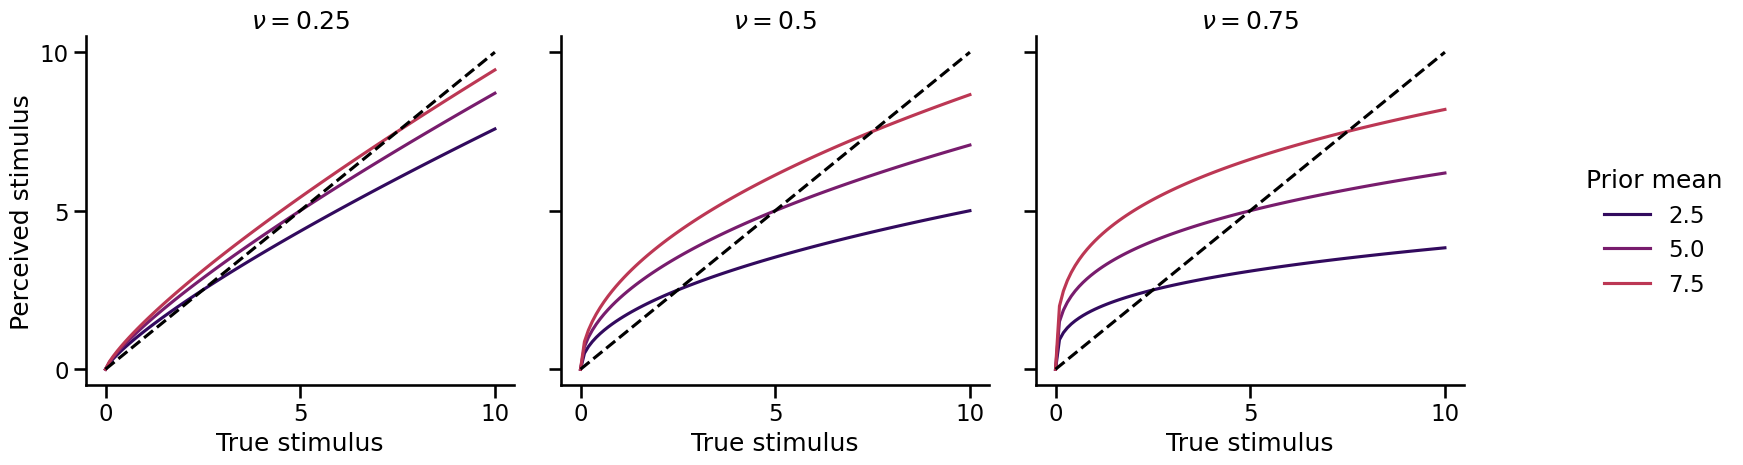

In [52]:
sns.set_context('talk')
g = sns.relplot(data=df, x='x', y='x_hat', hue='prior_mean_natural', col='noise', kind='line', palette=sns.color_palette('inferno', 5))
for ax in g.axes.flat:
    ax.plot(x, x, 'k--')
g.set(xticks=[0, 5, 10], yticks=[0, 5, 10], xlabel='True stimulus', ylabel='Perceived stimulus')
g.set_titles(r'$\nu = {col_name}$')
g._legend.set_title('Prior mean')

### Risky choices: two numerosity percepts in different ranges (2 priors)

In [2]:
def get_bayInf_df(risky_prior_mu,risky_prior_sd,safe_prior_mu,safe_prior_sd,evidence_sd):
    df = []
    x = np.linspace(5, 120, 200)
    ev_safe = x
    ev_risky = x*0.55 

    for riskiness in ['safe', 'risky']:
        prior_mu = risky_prior_mu if riskiness == 'risky' else safe_prior_mu
        prior_sd = risky_prior_sd if riskiness == 'risky' else safe_prior_sd
        w_prior = evidence_sd**2 / (prior_sd**2 + evidence_sd**2)
        w_evidence = 1 - w_prior

        x_hat = np.exp(w_evidence * np.log(x) + w_prior * prior_mu)
        ev_hat = x_hat * .55 if riskiness == 'risky' else x_hat # EV - expected value !
        df.append(pd.DataFrame({'x': x, 'ev': ev_risky if riskiness == 'risky' else ev_safe, 'ev_hat': ev_hat, 'x_hat':x_hat,
                            'riskiness':riskiness}))

    df = pd.concat(df).set_index(['riskiness'])

    return df

In [88]:
risky_prior_mu = 2.8
risky_prior_std = .4

safe_prior_mu = 2.5
safe_prior_std = .2

evidence_sd = .2 * 2

df = get_bayInf_df(risky_prior_mu,risky_prior_std,safe_prior_mu,safe_prior_std,evidence_sd)

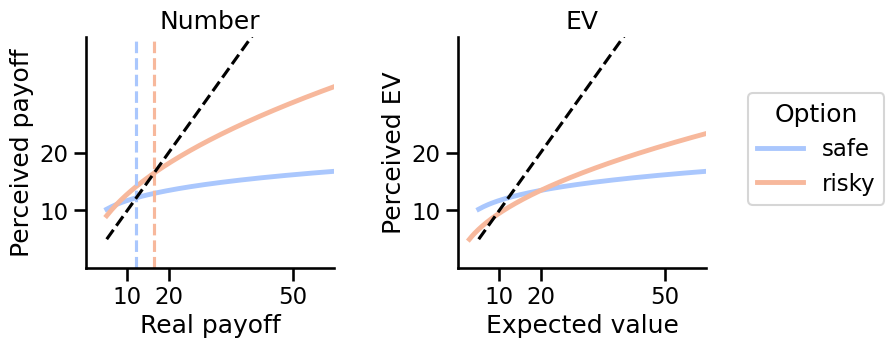

In [105]:
fig, axs = plt.subplots(1, 2, figsize=(8,3))

sns.lineplot(x='x', y='x_hat', hue='riskiness', data=df, lw=3.5, palette=sns.color_palette('coolwarm', 2), ax=axs[0])
axs[0].axvline(np.exp(safe_prior_mu), c=sns.color_palette('coolwarm', 2)[0], ls='--')
axs[0].axvline(np.exp(risky_prior_mu), c=sns.color_palette('coolwarm', 2)[1], ls='--')
axs[0].set(title='Number',xlabel='Real payoff', ylabel='Perceived payoff', ylim=(0, 40), xticks=[10, 20, 50], yticks=[10, 20], xlim=(0, 60))

sns.lineplot(x='ev', y='ev_hat', hue='riskiness', data=df, lw=3.5, palette=sns.color_palette('coolwarm', 2), ax=axs[1])
axs[1].set(title='EV',xlabel='Expected value', ylabel='Perceived EV', ylim=(0, 40), xticks=[10, 20, 50], yticks=[10, 20], xlim=(0, 60))

for ax in axs:
    ax.plot(x, x, 'k--')
    ax.get_legend().remove()

handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0.95, 0.7), borderaxespad=0.1, title='Option')

fig.subplots_adjust(wspace=0.5)
sns.despine()


In [2]:
def get_bayInf_df_choicePairs(risky_prior_mu,risky_prior_sd,safe_prior_mu,safe_prior_sd,evidence_sd):
    df = []
    x_safe = np.linspace(5, 120, 200)
    x_risky = x_safe / 0.55

    w_prior = evidence_sd**2 / (safe_prior_sd**2 + evidence_sd**2)
    w_evidence = 1 - w_prior
    x_safe_hat = np.exp(w_evidence * np.log(x_safe) + w_prior * safe_prior_mu)

    w_prior = evidence_sd**2 / (risky_prior_sd**2 + evidence_sd**2)
    w_evidence = 1 - w_prior
    x_risky_hat = np.exp(w_evidence * np.log(x_risky) + w_prior * risky_prior_mu)

    ev_safe_hat = x_safe_hat    
    ev_risky_hat = x_risky_hat * 0.55

    ev_hat_diff = ev_risky_hat - ev_safe_hat

    df = pd.DataFrame({'ev_diff': ev_hat_diff, 'ev_safe': ev_safe_hat, 'ev_risky': ev_risky_hat, 'x_safe': x_safe, 'x_risky': x_risky})

    return df

In [3]:
def plot_EVdiff(df,risky_prior_mu, safe_prior_mu,figsize=(4,4),ylim=(-5, 40),xlim=(5, 60)):

    plt.figure(figsize=figsize)
    fig = sns.lineplot(x='x_safe', y='ev_diff', data=df, lw=3.5,c='green' ) #, palette=sns.color_palette('coolwarm', 2), ax=axs[0])
    fig.set(xlabel='Stake Size (n_safe)', ylabel = 'EV diff (risky-safe)', ylim=ylim,xlim=(xlim))

    x = np.linspace(0, 120, 200)
    plt.plot(x,x, c='grey', ls='--')

    plt.axhline(0, c='k', ls='--')
    sns.lineplot(x='x_safe', y='ev_risky', data=df, lw=3.5,c = sns.color_palette('coolwarm', 2)[1],ax=fig) 
    sns.lineplot(x='x_safe', y='ev_safe', data=df, lw=3.5,c = sns.color_palette('coolwarm', 2)[0],ax=fig)

    plt.axvline(np.exp(safe_prior_mu), c=sns.color_palette('coolwarm', 2)[0], ls='--')
    plt.axvline(np.exp(risky_prior_mu), c=sns.color_palette('coolwarm', 2)[1], ls='--')

    return fig

<Axes: xlabel='Stake Size (n_safe)', ylabel='EV diff (risky-safe)'>

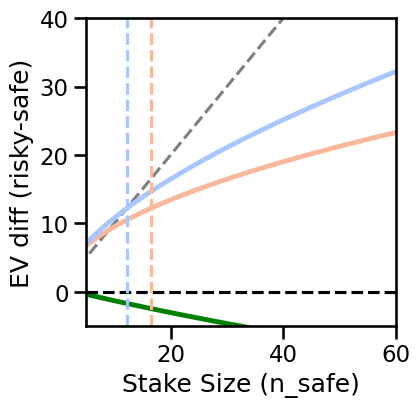

In [9]:
# some plausible values 

risky_prior_mu = 2.8
risky_prior_std = .4

safe_prior_mu = 2.5
safe_prior_std = .5

evidence_sd = .2 * 2

df = get_bayInf_df_choicePairs(risky_prior_mu,risky_prior_std,safe_prior_mu,safe_prior_std,evidence_sd)
plot_EVdiff(df, risky_prior_mu, safe_prior_mu)

the looser the safe prior, the more risk-averse

the tighter the safe prior, the more risk seeking

## param values from bauer model

In [4]:
import arviz as az
import os.path as op

model_label = '2'
format = 'symbolic'

In [5]:
# dyscalculiaData
dataset = 'dyscalculiaData'

bids_folder = '/Users/mrenke/data/ds-dnumrisk'
idata = az.from_netcdf(op.join(bids_folder, f'derivatives/cogmodels_risk/model-{model_label}_format-{format}_trace.netcdf'))

from utils_02 import build_model
from utils import get_data

df_ = get_data(bids_folder)

model = build_model(model_label, df_)
model.build_estimation_model()
params = list(model.free_parameters.keys())

from bauer.utils.bayes import softplus

for param in params:
    df_param = idata.posterior[param +'_mu'].to_dataframe()
    df_param = df_param.xs('Intercept', 0, 2)
    if 'sd' in param:
        df_param = softplus(df_param)
        
    exec(f"{param} = df_param.mean()[0]")

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


number of subjects in dataframe: 66
Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
            52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66],
           dtype='int64', name='subject')


In [7]:
# MiguelsData
from bauer.models import RiskModel
from bauer.utils.data import load_garcia2022


bids_folder = '/Users/mrenke/data/ds-miguel'

df = load_garcia2022(task='risk')
dataset = 'MiguelsData'
format = 'symbolic'
model_label = '2' 

df = df.xs(format,0, level='format')
model = RiskModel(df, prior_estimate='full',fit_seperate_evidence_sd = False)
model.build_estimation_model()

idata = az.from_netcdf(op.join(bids_folder, f'derivatives/cogmodels_risk/model-{model_label}_format-{format}_trace.netcdf'))

from bauer.utils.bayes import softplus

for param in model.free_parameters:
    df_param = idata.posterior[param + '_mu'].to_dataframe()
    #df_param = df_param.xs('Intercept', 0, 3)
    if 'sd' in param:
        df_param = softplus(df_param)
        
    exec(f"{param} = df_param.mean()[0]")

safe_prior_sd: 0.869
risky_prior_sd: 1.171
evidence_sd: 0.776
safe_prior_mu: 3.234
risky_prior_mu: 2.877


Text(0.5, 1.0, 'MiguelsData')

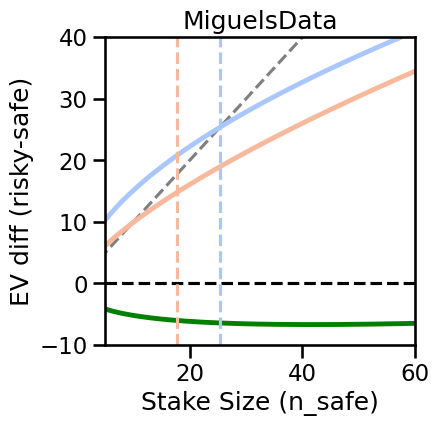

In [8]:
print(f"safe_prior_sd: {safe_prior_sd:.3f}")
print(f"risky_prior_sd: {risky_prior_sd:.3f}")
print(f"evidence_sd: {evidence_sd:.3f}")

print(f"safe_prior_mu: {safe_prior_mu:.3f}")
print(f"risky_prior_mu: {risky_prior_mu:.3f}")

df = get_bayInf_df_choicePairs(risky_prior_mu,risky_prior_sd,safe_prior_mu,safe_prior_sd,evidence_sd)
plot_EVdiff(df, risky_prior_mu, safe_prior_mu, ylim=(-10, 40), xlim=(5, 60))
plt.title(dataset)

Text(0.5, 1.0, 'p = 0.943')

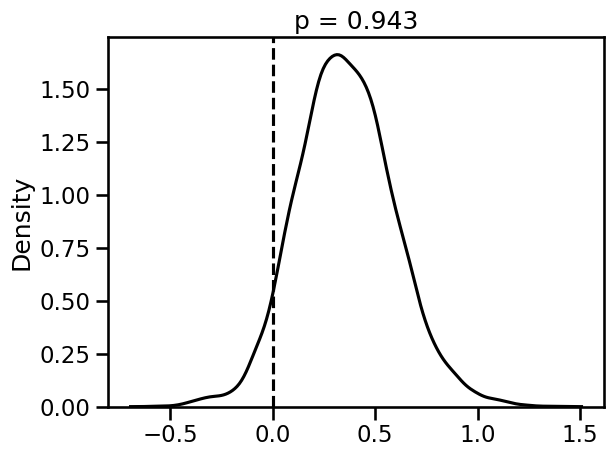

In [9]:
# safe_prior mu in Migules data larger than risky_prior_mu, but significant?

mu_dif = idata.posterior['safe_prior_mu_mu'].to_dataframe()['safe_prior_mu_mu'] - idata.posterior['risky_prior_mu_mu'].to_dataframe()['risky_prior_mu_mu'] 
sns.kdeplot(mu_dif, color='black')
plt.axvline(0, c='k', ls='--')
p_val = (mu_dif > 0).mean()
plt.title(f"p = {p_val:.3f}")

In [ ]:
 - - idata.posterior['risky_prior_mu'].to_dataframe() 